# Basic Feature Engineering in Machine Learning using Titanic Dataset

This project completed as part of my course completion in DQLab learning basics of machine learning.

In this project, a model random forest will be made under 2 conditions: with feature engineering and without feature engineering. Feature engineering is a process to extract additional feature from raw data in purpose to improve the performance of the model. The dataset used in this project originates from 2 datasets containing victims information of RMS Titanic accident in 1912.

## 1) Import dataset

To start this project, import the datasets that consists of train dataset for machine learning model training purpose and test dataset to evaluate the model.

In [1]:
# Import libraries and datasets
import pandas as pd
import numpy as np

df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

print('Train dataset information\n')
print(df_train.info(),'\n')
print('Test dataset information\n')
print(df_test.info())

Train dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

Test dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  ---

After loading both train and test datasets, as can be seen that train dataset contains 891 data points and 12 columns and the test dataset contains 418 data points and 11 columns, also notice that there are some missing data in both datasets. Since the titanic passengers data was already split into train and test dataset, the datasets need to be merged to handle missing data based on whole RMS Titanic passenger data.

In [2]:
# Merge train and test dataset
def df_concat(train, test):
    return pd.merge(left = train, right = test, how = 'outer', sort = True)
df_merge = df_concat(df_train, df_test)
df_merge = df_merge[sorted(df_merge)]
print('Merged dataset information\n')
print(df_merge.info(),'\n')

Merged dataset information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None 



In [3]:
df_merge

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


The merged dataset consists of 1309 data points and 11 columns. Since the purpose of the model is predict passengers who survived or not in the titanic incident, column dubbed *Survived* will be used as target and the rest of the columns will be used to determine if certain passenger was alive or dead during the accident. The detail of each column in the dataset is explained below:

1) **Age**: Recorded age of each passenger in the ship.

2) **Cabin**: Cabin number of each passenger in the ship.

3) **Embarked**: Places where each passenger boarded up (S if boarded from Southhampton, C if boarded from Cherbourg, Q if boarded from Queenstown).

4) **Fare**: Fare that charged for each passenger on board.

5) **Name**: Recorded name of each passenger in the ship.

6) **Parch**: Number of passenger's parents and child that on boarded.

7) **PassengerID**: Identification number of passengers.

8) **Pclass**: Social class of each passenger in the ship (smallest number represents upper social class and lowest number represents lower social class).

9) **Sex**: Gender of each passenger in the ship. Male or female.

10) **SibSp**: Numbers of siblings and spouse that came along with the passenger in the ship.

11) **Survived**: Survival status of passengers, represented by boolean numbers (1 for alive and 0 for dead).

12) **Ticket**: Ticket number series of each passengers in the ship. Ideally, every passenger has different and unique ticket series.

Notice that there are some missing data in all dataset that results in missing data in the recently merged dataframe, this also includes missing data in the target column. To handle missing data in the target column, handling missing data in variables need to be done.

## 2) Missing data handling and data exploration

As mentioned before, there are some missing data that has to be filled before further data exploration and data analysis begin. To make clear idea of how many missing data in all imported datasets and the merged dataframe, quantity of missing data will be shown below.

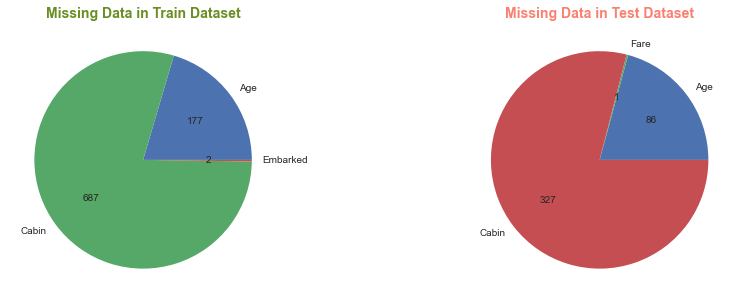

In [4]:
import matplotlib.pyplot as plt
import squarify as sqr
plt.style.use('seaborn')

# Make dataframe for missing data visualization for both train and test datasets
treemap_train_df = pd.DataFrame({'column':df_train.columns.to_list(), 'missing_data':df_train.isna().sum()})
treemap_train_df.index = [i for i in range(0,12)]
treemap_train_df = treemap_train_df.loc[treemap_train_df['missing_data'] > 0]

treemap_test_df = pd.DataFrame({'column':df_test.columns.to_list(), 'missing_data':df_test.isna().sum()})
treemap_test_df.index = [j for j in range(0,11)]
treemap_test_df = treemap_test_df.loc[treemap_test_df['missing_data'] > 0]

# Function for convert percent to integer
def numb(pct, qua):
    n = pct/100 * np.sum(qua)
    return '{}'.format(int(n.round(decimals = 0)))

# Visualize both of the datasets
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axs[0].pie(treemap_train_df['missing_data'],
          labels = treemap_train_df['column'],
          autopct = lambda x: numb(x, treemap_train_df['missing_data']))
axs[1].pie(treemap_test_df['missing_data'],
          labels = treemap_test_df['column'],
          autopct = lambda x: numb(x, treemap_test_df['missing_data']))
axs[0].set_title('Missing Data in Train Dataset', fontsize = 14, weight = 'bold', color = 'olivedrab')
axs[1].set_title('Missing Data in Test Dataset', fontsize = 14, weight = 'bold', color = 'salmon')
#plt.savefig('missing_data_identification.png')
plt.show()

From the pie charts that explains the missing data in both datasets, it is clear there are:

**1) 263 missing data that give information about age of RMS Titanic passengers**

**2) 2 missing data that give information about place where each passenger embarked**

**3) 1 missing data that gives information about fare**

**4) 1041 missing data that give information about cabin for each passenger**

Intuitively, handling missing data for *Cabin* column is not necessary. Reason behind this is probably there are so many unique data in the column. Filling the missing data in the column is not essential to predict survival status for each passenger. However, removing some data points cannot be done as well since there is risk that this procedure will make the model cannot make good survival status prediction.

In [5]:
print('Unique value count in Cabin column: {} counts'.format(df_merge['Cabin'].nunique()))

Unique value count in Cabin column: 186 counts


It is proved that there are 186 unique values in the column. Filling the missing data, it will be time-wasting process. Remove data points that have missing data, there is risk to make poor model performance.

Handling missing data in *Age*, *Embarked*, and *Fare* will be done in this step, starting with search the relation between each variable that is assumed to be linear to each other. Examining the relation between each variable is to decide how to fill the missing data based on most-related variables or how dependent that variable to the others.

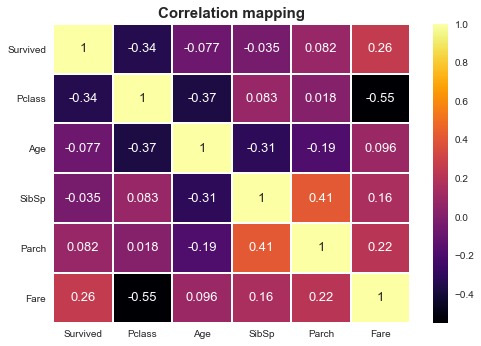

In [6]:
# Examine correlation between each variables

import seaborn as sns
sns.set_style(style = 'darkgrid')

df_corr = df_train.drop(columns = 'PassengerId', axis = 1).corr()

plt.figure()
heatmap = sns.heatmap(data = df_corr, annot = True, annot_kws = {'size':13}, linewidths = 1, cmap = 'inferno', 
                      yticklabels = 'auto')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0)
plt.title('Correlation mapping', fontsize = 15, weight = 'bold')
#plt.savefig('Correlation_heatmap.png')
plt.show()

From this correlation mapping, there are some points of analysis that can be made:

1) Correlation of each variable can be seen if the data type of certain column is integer or float. So to fill missing data that contain object, another method has to be done.

2) If the passenger brings his/her siblings or spouse with him/her, his/her children or parents are likely to come along with the passenger as well.

3) Age factor is closely related to social class and siblings or spouse who came along. Social class of passenger tends to be in lower class if the passenger is young. Siblings or spouse is likely to come along with the passenger if the age of passenger is young. For survival, it is not strongly related to age.

4) Fare factor is closely related to social class, siblings and spouse who came along, and how many parents and children who came along with the passenger. It clearly makes sense if the fare is getting expensive along with higher social class. Fare is getting expensive if the passenger brings more their family members with them in the ship as well. For survival probability, it cannot be analyzed clearly because the *Survived* column has discrete value and it is hardly to be compared to column with continous value.

Analysis of point 3 and 4 can be taken into account to fill the missing data in the dataframe. For filling the missing data in *Age* column, calculating the median can be used based on the social class and the gender of each passenger, which is make sense to group the passengers based on gender.

In [7]:
# Calculate average age of each passenger based on social class and gender

age_grouping = df_merge.copy()
age_grouping = age_grouping.groupby(['Sex','Pclass'])['Age'].median().reset_index()
age_grouping['Social_class'] = age_grouping['Pclass'].map({1:'high', 2:'average', 3:'low'})
age_grouping = age_grouping.drop(columns = 'Pclass', axis = 1)

def age_information(df):
    for i, j, k in zip(df['Sex'], df['Social_class'], df['Age']):
        print('Average age of {} {} class passenger is {}'.format(i, j, int(k)))
    
age_information(age_grouping)

Average age of female high class passenger is 36
Average age of female average class passenger is 28
Average age of female low class passenger is 22
Average age of male high class passenger is 42
Average age of male average class passenger is 29
Average age of male low class passenger is 25


In [8]:
# Filling the missing age data with based on the description above
df_merge['Age'] = df_merge.groupby(['Sex','Pclass'])['Age'].apply(lambda row: row.fillna(row.median()))

After handling missing data of age information, now missing data that has information of passenger embarkation will be handled. Note that embarkation data has data type of object, not number (integer or float). To handle this kind of data type, there are 2 options:

1) Remove the row that has missing embarkation data.

2) Fill the missing embarkation data based on where most passenger embarked from.

For this case, it is better to fill the data rather than remove the row with missing data. By removing the row that contains missing data, there is a risk to make the performance of model even worse.

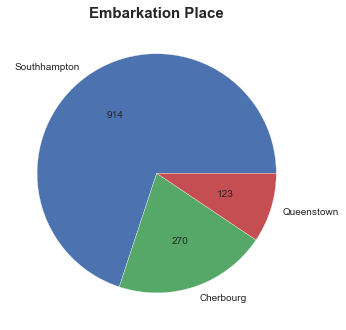

In [9]:
# Get information about embarkation and pick embarkation place where most passenger embarked from.
plt.figure()
plt.pie(df_merge['Embarked'].value_counts().values, 
        labels = ['Southhampton','Cherbourg','Queenstown'], 
        autopct = lambda x: numb(x, df_merge['Embarked'].value_counts().values))
plt.title('Embarkation Place', fontsize = 15, weight = 'bold')
plt.savefig('Embarkation_data.png')
plt.show()

Information from the pie chart above shows that most passengers embarked from Southhampton, it is decided to fill the 2 missing data with passengers embarked from Southhampton.

In [10]:
# Fill the column with 'S' that represents Southhampton
df_merge['Embarked'] = df_merge['Embarked'].fillna('S')

There is one more missing data, which has information about charged fare on a passenger. At this point, it is still not known clearly who is the passenger that does not have information about the fare. Based on the previous analysis about variable correlation, fare is getting more expensive if the passenger has higher social class and more family members are came along with the passenger. To be sure, the passenger with missing fare data must be located.

In [11]:
# Locate the passenger with missing fare data
print(df_merge.loc[df_merge['Fare'].isna()])

       Age Cabin Embarked  Fare                Name  Parch  PassengerId  \
1043  60.5   NaN        S   NaN  Storey, Mr. Thomas      0         1044   

      Pclass   Sex  SibSp  Survived Ticket  
1043       3  male      0       NaN   3701  


Mr. Thomas Storey is the passenger with missing fare data. Mr. Storey is a low social class passenger without bringing his family member with him in the ship. The missing fare data will be filled with average fare for low social class passengers without any family member on board.

In [12]:
# Fill the missing data in fare column of merged dataframe
median_poor = df_merge.groupby(['Pclass','SibSp','Parch'])['Fare'].median()[3][0][0]
df_merge['Fare'] = df_merge['Fare'].fillna(median_poor)

Before further analysis, final check is needed to make sure if there are no missing data in some necessary columns.

In [13]:
# Missing data checking
check_missing = pd.DataFrame({'Column':df_merge.isna().sum().index.to_list(), 
                               'Missing_data':df_merge.isna().sum().values})
check_missing = check_missing.set_index('Column')\

print(check_missing,'\n')
print('No missing data in some necessary variables. Further data pre-processing analysis will be done.')

             Missing_data
Column                   
Age                     0
Cabin                1014
Embarked                0
Fare                    0
Name                    0
Parch                   0
PassengerId             0
Pclass                  0
Sex                     0
SibSp                   0
Survived              418
Ticket                  0 

No missing data in some necessary variables. Further data pre-processing analysis will be done.


Since the correlation between the target and variables are hardly related for some reasons, another data visualization method is needed to see these relations to count the passengers who survived or not survived in the accident.

To count the passengers survival status, variables that only have few unique values is used for the analysis such as *Embarked*, *Parch*, *Pclass*, *Sex*, and *SibSp* columns. By having variables only few unique values, survival count will be much easier to interpret and get insight from it.

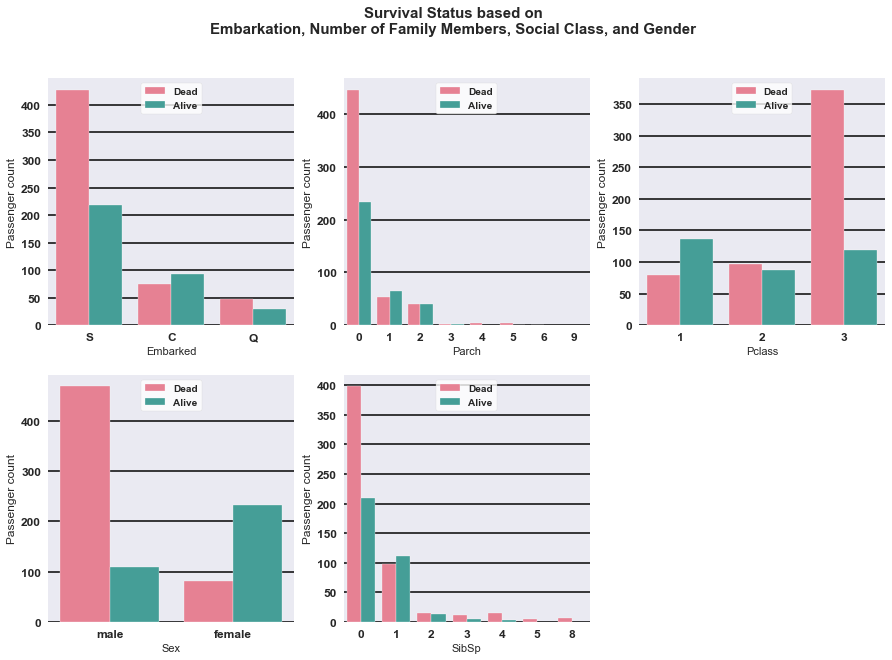

In [14]:
# Visualize survival counts based on variables that have few unique values.

unique_columns = ['Embarked','Parch','Pclass','Sex','SibSp']

plt.figure(figsize = (15, 10))
plt.suptitle('Survival Status based on\nEmbarkation, Number of Family Members, Social Class, and Gender', fontsize = 15,
            fontweight = 'bold')

for i, col in enumerate(unique_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x = df_merge[col], hue = df_merge['Survived'], palette = 'husl')
    plt.xticks(fontsize = 12, weight = 'bold')
    plt.yticks(fontsize = 12, weight = 'bold')
    plt.ylabel('Passenger count', fontsize = 12)
    plt.grid(color = 'black', linewidth = 1.5, axis = 'y')
    plt.legend(['Dead','Alive'], loc = 'upper center', frameon = True, facecolor = 'white',
              prop = {'weight':'bold'})
plt.savefig('Survival_status_1.png')
plt.show()

With analyzing the graphs above, there are 2 points of analysis to see the survival factor based on embarkation, family members, social class, and gender:

1) When RMS Titanic sank, more than 400 male passengers died. It is possible that most male passengers died in the were low social class gentlemen that embarked from Southhampton.

2) Passengers who brought their parents or/and children and passengers who brought their siblings or/and spouse do have same survival trend. Passengers who did not bring their family members/relatives are likely not survived the accident and, strangely, passengers who brought one of their family members/relatives tend to successfully survive from the sinking ship.

However, using this perspective as survival analysis is not robust. Note that there are some passengers that are unknown about their survival status and it cannot be randomly filled as 'Survived' or 'Not Survived' since that variable is the categorical label.

Next is to explore this data to get more insight about the fare variations.

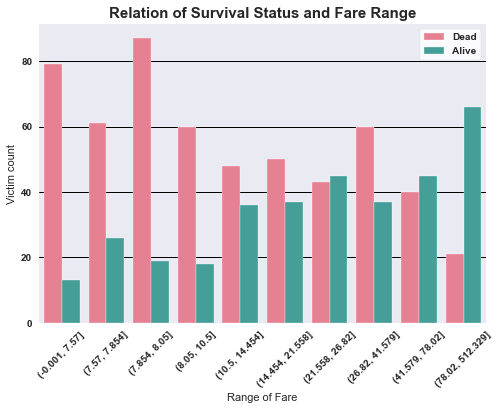

In [15]:
# Get information about fare variations that were charged to each passenger

df_merge['Fare_range'] = pd.qcut(df_merge['Fare'], q = 10)

plt.figure()
sns.countplot(data = df_merge, x = 'Fare_range', hue = 'Survived', palette = 'husl')
plt.title('Relation of Survival Status and Fare Range', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45, weight = 'bold')
plt.yticks(weight = 'bold')
plt.ylabel('Victim count')
plt.xlabel('Range of Fare')
plt.grid(axis = 'y', color = 'black')
plt.legend(['Dead','Alive'], frameon = True, facecolor = 'white', prop = {'weight':'bold'})
plt.savefig('Survival_status_2.png')
plt.show()

From the graph above, it is shown that trend of fare and social status data trend are almost the same. More expensive fare that charged to a passenger and higher social class of a certain passenger indicate higher chance to survive. The data trend explained clearly that passengers with high social class will be charged with relatively expensive fare compared to average and low social class, and this explaination satisfies the variable correlation argument about relation between social class and fare.

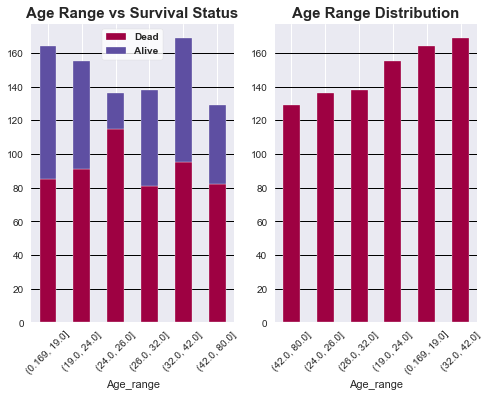

In [16]:
# Get insight about age and survival status
df_merge['Age_range'] = pd.qcut(df_merge['Age'], q = 6)

Age_plot = pd.crosstab(df_merge['Age_range'], df_merge['Survived'])
Age_distribution = pd.DataFrame({'Age_range':df_merge['Age_range'], 'Survived': df_merge['Survived']}).groupby('Age_range').count().sort_values(by = 'Survived', ascending = True)

plot_list = [Age_plot, Age_distribution]
stack = [True, False]
no = [0, 1]
fig, axs = plt.subplots(nrows = 1, ncols = 2)
for i, j, k in zip(plot_list, stack, no):
    i.plot.bar(stacked = j, ax = axs[k], colormap = 'Spectral')
    axs[k].tick_params(axis = 'x', labelrotation = 45)
    axs[k].grid(axis = 'y', color = 'black')
axs[0].set_title('Age Range vs Survival Status', fontsize = 15, weight = 'bold')
axs[1].set_title('Age Range Distribution', fontsize = 15, weight = 'bold')
axs[0].legend(['Dead', 'Alive'], frameon = True, facecolor = 'white', prop = {'weight':'bold'})
axs[1].legend([])
plt.savefig('Survival_status_3.png')
plt.show()

Majority of RMS Titanic passengers were in age of 32 to 42 years old. This range of age also represents high social class passengers because, as mentioned before, average age of male passengers with high social class is 42 years old and the average of high social class female passengers is 36 years old.

For death toll, passengers with age range of 24 to 26 years old were the passengers with highest death toll with 115 people died during the accident.

## 3) Data Pre-processing with feature engineering

To make a dataset for modelling/machine learning purpose, every data column in the dataset has to be in type of integer or float. In this step, data that has information about tickets will be converted into numbers. This step has purpose to see if every passenger really does have ticket with unique series.

In [17]:
# Verifying how many tickets that have unique identification number

print('Numbers of unique ticket identification number of RMS Titanic on each passenger:')
print('{} tickets'.format(df_merge['Ticket'].nunique()))

Numbers of unique ticket identification number of RMS Titanic on each passenger:
929 tickets


Each passenger in the ship did not have unique ticket number series, there are more than one passengers that held ticket with the same identification number. The question is how many tickets that has same identification number.

In [18]:
# Calculate how many tickets that have same identification number

df_merge['Ticket_count'] = df_merge.groupby('Ticket')['Ticket'].transform('count')
df_merge.loc[(df_merge['Ticket'] == '2668') | (df_merge['Ticket'] == 'PC 17758')]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_range,Age_range,Ticket_count
128,22.0,F E69,C,22.3583,"Peter, Miss. Anna",1,129,3,female,1,1.0,2668,"(21.558, 26.82]","(19.0, 24.0]",3
307,17.0,C65,C,108.9000,"Penasco y Castellana, Mrs. Victor de Satode (M...",0,308,1,female,1,1.0,PC 17758,"(78.02, 512.329]","(0.169, 19.0]",3
505,18.0,C65,C,108.9000,"Penasco y Castellana, Mr. Victor de Satode",0,506,1,male,1,0.0,PC 17758,"(78.02, 512.329]","(0.169, 19.0]",3
533,22.0,NaN,C,22.3583,"Peter, Mrs. Catherine (Catherine Rizk)",2,534,3,female,0,1.0,2668,"(21.558, 26.82]","(19.0, 24.0]",3
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,"(78.02, 512.329]","(32.0, 42.0]",3
1308,25.0,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668,"(21.558, 26.82]","(24.0, 26.0]",3


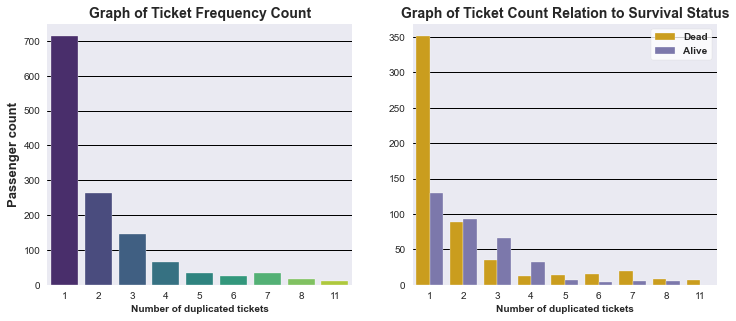

In [19]:
# Visualize the ticket frequency and its relation to survival status

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.8))
sns.barplot(x = df_merge['Ticket_count'].value_counts().index,
               y = df_merge['Ticket_count'].value_counts().values, palette = 'viridis', ax = axs[0])
sns.countplot(data = df_merge, x = 'Ticket_count', hue = 'Survived', palette = 'Dark2_r', ax = axs[1])
axs[1].set_ylabel('')
axs[0].set_ylabel('Passenger count', fontsize = 13, weight = 'bold')
for i, j in zip(range(0, 2), ['Ticket Frequency Count', 'Ticket Count Relation to Survival Status']):
    axs[i].set_title('Graph of {}'.format(j), weight = 'bold', fontsize = 14)
    axs[i].set_xlabel('Number of duplicated tickets', fontsize = 10, weight = 'bold')
    axs[i].grid(axis = 'y', color = 'black')
axs[1].legend(['Dead', 'Alive'], frameon = True, facecolor = 'white', loc = 'upper right', prop = {'weight':'bold'})
plt.savefig('Survival_Based_on_Ticket.png')
plt.show()

There are some passengers that had more than 1 ticket that has unique identification numbers. The most possible reason behind this is that passengers that brought their family members (spouse, siblings, parents, or children) or their relatives outside their family were counted as 1 ticket for each family member. For example, ticket with identification number of **2668** has 3 tickets that belong to Peter family and ticket with identification number of **PC 17758** has 3 tickets that 2 of 3 tickets belong to Penasco y Castellana family and the last ticket belong to Dona. Fermina Oliva y Ocana, who was possibly a relative to Penasco y Castellana family.

For survival status, it is shown that number of duplicated ticket of 2 to 4 tickets are more likely to be survived during the accident, it is proven from the table that most Peter family members were survived from the sinking ship.

In purpose to try to improve the model performance, a new column that gives information of family size group will be made since columns that have information about numbers of siblings or/and spouse *SibSp* and numbers of parents and/or children *Parch* seem to be not efficient for the model.

The new column follows the formula below:

$$ Total\,Family\,Member = (Number\,of\,Siblings\,or\,Spouse) + (Number\,of\,Parents\,or\,Children) + 1 $$

with 1 for the passenger itself.

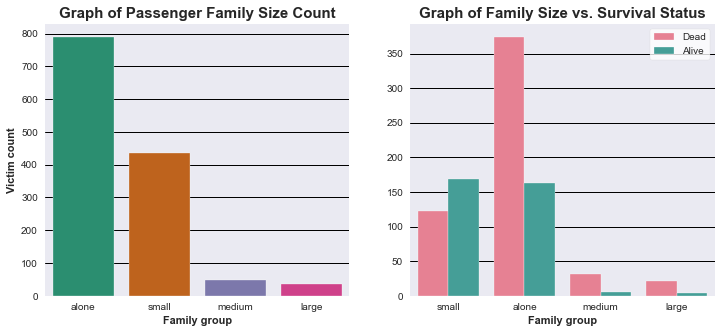

In [20]:
# Make the total function and apply the function into the new column dubbed "Total_members"

def members(df):
    x = df['Parch'] + df['SibSp'] + 1
    return x

df_merge['Total_members'] = df_merge.apply(members, axis = 1)

# Group the total family members

df_merge['Family_group'] = df_merge['Total_members'].map({1:'alone', 2:'small', 3:'small', 4:'small',
                                                          5:'medium', 6:'medium', 7:'large', 8:'large', 11:'large'})

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.barplot(x = df_merge['Family_group'].value_counts().index, y = df_merge['Family_group'].value_counts().values, ax = axs[0],
           palette = 'Dark2')
sns.countplot(data = df_merge, x = 'Family_group', hue = 'Survived', ax = axs[1], palette = 'husl')
axs[1].set_ylabel('')
axs[0].set_ylabel('Victim count', fontsize = 11, weight = 'bold')
for i, j in zip(range(2), ['Passenger Family Size Count', 'Family Size vs. Survival Status']):
    axs[i].set_title('Graph of {}'.format(j), fontsize = 15, weight = 'bold')
    axs[i].set_xlabel('Family group', fontsize = 11, weight = 'bold')
    axs[i].grid(axis = 'y', color = 'black')
axs[1].legend(['Dead','Alive'], frameon = True, facecolor = 'white')
plt.savefig('Family_size.png')
plt.show()

Most of RMS Titanic passengers were alone and the passengers who brought small amount of family members (2 to 4 people) were more likely to survive and strangely passengers who went on board to RMS Titanic alone contributed to most dead victim count in the ship. However, passengers who brought more than 4 family members had more chance to die during the accident which is make sense because passenger's family members tried to save each other lives.

In [21]:
# Make column that contain information about each passenger title
import string

df_merge['Title'] = df_merge['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])
print(df_merge['Title'].unique().tolist())

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona']


There are so many title, and this obviously will be unefficient for the model since there are so many title categories for every passenger in the ship. However, the titles can be simplified since the title is based on person's gender. Like *Mr* title for **male passengers** and *Mrs*, *Miss*, *Mme* (Madame), *Ms*, *Lady*, *Mlle* (Madame for unmarried women), *the Countess*, and *Dona* titles for **female passenger**. For "special title" such as *Dr*, *Don*, *Master*, *Rev*, *Major*, *Sir*, *Col*, *Capt*, and *Jonkheer* titles will be homogenized as well into 1 title group.

Before rename the titles to homogenize the title based on gender, since majority of female passengers with *Mrs* title brought their siblings or/and spouse which indicate possibly they were married. A new column can be made that contain information about marriage status.

In [22]:
# Make function to mark marriage status (1 for married and 0 for not married) and apply the function into new column

def marriage(df):
    if df['Title'] == 'Mrs':
        return 1
    else:
        return 0
df_merge['Married'] = df_merge.apply(marriage, axis = 1)

Title grouping will be split into 3 groups: *Mr*, *Mrs/Lady/Miss*, *Dr/Military/Noble/Sir/Clergy*

1) **Mr** title: Title for male passengers with title of *Mr* in front of their name

2) **Mrs/Lady/Miss** title group: Title group for female passenger with title of *Mrs*, *Miss*, *Mme*, *Ms*, *Lady*, *Mlle*, *the Countess*, or *Dona* in front of their name.

3) **Dr/Master/Military/Noble/Sir/Clergy** title group: Title group for passenger with "special title", such as *Master*, *Don*, *Rev*, *Dr*, *Major*, *Sir*, *Col*, *Capt*, or *Jonkheer* in front of their name.

In [23]:
# Homogenize the title based on gender and special titles

female_titles = ['Mrs','Miss','Mme','Ms','Lady','Mlle','the Countess','Dona']
special_titles = ['Master','Don','Rev','Dr','Major','Sir','Col','Capt','Jonkheer']

# Rename the titles for female passengers
df_merge['Title'] = df_merge['Title'].replace(special_titles, 'Dr/Master/Military/Noble/Sir/Clergy')

# Rename the titles for passengers with "special title"
df_merge['Title'] = df_merge['Title'].replace(female_titles, 'Mrs/Lady/Miss')

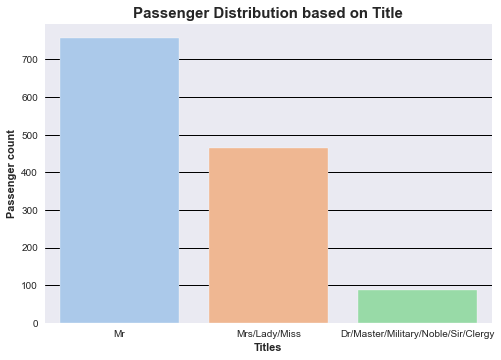

In [24]:
# Visualize passenger distribution that has title of "Mr", "Mrs/Lady/Miss", and "Dr/Master/Military/Noble/Sir/Clergy"

plt.figure()
sns.barplot(x = df_merge['Title'].value_counts().index, y = df_merge['Title'].value_counts().values, palette = 'pastel')
plt.title('Passenger Distribution based on Title', fontsize = 15, weight = 'bold')
plt.xlabel('Titles', fontsize = 11, weight = 'bold')
plt.ylabel('Passenger count', fontsize = 11, weight = 'bold')
plt.grid(axis = 'y', color = 'black')
plt.savefig('Title_count.png')
plt.show()

There are some columns that has non-numeric values. Those columns cannot be fitted into the model since it only accepts numeric values only. To overcome this problem, each column values have to be converted into numbers by encoding the values. For example, for column which has information about embarkation with value of *C*, *S*, and *Q* will be encoded into values of 0, 1, and 2. The encoding order is based on alphabetical order and the encoded value starts from 0.

In [52]:
# Make a copy of df_merge, in case if there is something wrong when processing the dataframe

from sklearn.preprocessing import LabelEncoder

df_merge_copy = df_merge.copy()
df_merge_copy = df_merge_copy.drop(columns = ['Fare'], axis = 1)

# Process the columns with data type of object. Process the columns by encoding each column values

column_object = ['Embarked','Sex','Fare_range','Family_group','Title']
LE = LabelEncoder()
for co in column_object:
    df_merge_copy[co] = LE.fit_transform(df_merge_copy[co])
    print(LE.classes_,'\n',np.sort(df_merge_copy[co].unique()),'\n')

['C' 'Q' 'S'] 
 [0 1 2] 

['female' 'male'] 
 [0 1] 

[Interval(-0.001, 7.57, closed='right')
 Interval(7.57, 7.854, closed='right')
 Interval(7.854, 8.05, closed='right')
 Interval(8.05, 10.5, closed='right')
 Interval(10.5, 14.454, closed='right')
 Interval(14.454, 21.558, closed='right')
 Interval(21.558, 26.82, closed='right')
 Interval(26.82, 41.579, closed='right')
 Interval(41.579, 78.02, closed='right')
 Interval(78.02, 512.329, closed='right')] 
 [0 1 2 3 4 5 6 7 8 9] 

['alone' 'large' 'medium' 'small'] 
 [0 1 2 3] 

['Dr/Master/Military/Noble/Sir/Clergy' 'Mr' 'Mrs/Lady/Miss'] 
 [0 1 2] 



For encoding the category data type such as the column that contains information about fare range, the encoded value starts from the lowest fare range (fare range of -0.001 - 7.57).

Since values in every column has no ordinal relation, one hot encoding may be needed to make more improvement in performance of the model by making order based on unique values of 1 or 0 for each value in the specific column, replacing the columns that has integer interpretation of ordered categories. The value of 1 implies that there is the specific integer encoded value in the column and vice versa.

In [26]:
# Feature engineering on categorical variables

from sklearn.preprocessing import OneHotEncoder

column_numeric = ['Embarked','Pclass','Sex','Family_group','Title']
empty_list = list()
for cn in column_numeric:
    OHE = OneHotEncoder()
    encoded = OHE.fit_transform(df_merge_copy[cn].values.reshape(-1,1)).toarray()
    n = df_merge_copy[cn].nunique()
    cols = ['{}_{}'.format(cn, n) for n in range (1, 1+n)]
    df_encoded = pd.DataFrame(encoded, columns = cols)
    df_encoded.index = df_merge_copy.index
    empty_list.append(df_encoded)

At this stage, a new dataframe that is prepared for modelling purpose will be made. This new dataframe consists of the merged dataframe and dataframe consists of columns that have already made before.

In [27]:
# Merge the list of encoded dataframes to the df_merge_copy dataframe

filled_list = pd.concat(empty_list, axis = 1)
df_merge_encoded = pd.concat([df_merge_copy, filled_list], axis = 1)
df_merge_encoded.head()

,Age,Cabin,Embarked,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,...,Pclass_3,Sex_1,Sex_2,Family_group_1,Family_group_2,Family_group_3,Family_group_4,Title_1,Title_2,Title_3
0,22.0,NaN,2,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,38.0,C85,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26.0,NaN,2,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,35.0,C123,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,35.0,NaN,2,"Allen, Mr. William Henry",0,5,3,1,0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Normalization is one of most important part of data modelling, it prevents the model performs badly especially in predictive models. In this project the columns that act as predictor or estimator will be normalized based on "Z-score" or standard score on gaussian curve or normal distribution. This technique of normalization follow this mathematical formula:

$$ Z = \frac{x-\mu}{\delta} $$

With *x* represents each value in the specific column, $\mu$ as mean value on specific column, and $\delta$ as standard deviation on specific column.

In [28]:
# Splitting and scaling the dataset

from sklearn.preprocessing import StandardScaler

unnecessary_columns = ['Cabin','Name','Embarked','PassengerId','Pclass','Sex','Ticket','Age_range','Total_members',
                      'Family_group','Title','Survived']

train_df = df_merge_encoded[:891]
test_df = df_merge_encoded[891:]
x_train = train_df.drop(columns = unnecessary_columns, axis = 1)
x_test = test_df.drop(columns = unnecessary_columns, axis = 1)
y_train = train_df['Survived']

ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

print('Shape of train data:\n')
print('Train dataframe variables: {} rows and {} columns'.format(x_train.shape[0], x_train.shape[1]))
print('Train data label: {} rows\n'.format(y_train.shape[0]))
print('')
print('Shape of test data:\n')
print('Test dataframe variables: {} rows and {} columns'.format(x_test.shape[0], x_test.shape[1]))

Shape of train data:

Train dataframe variables: 891 rows and 21 columns
Train data label: 891 rows


Shape of test data:

Test dataframe variables: 418 rows and 21 columns


As can be seen in the code, data splitting procedure uses manual splitting instead of using data splitting function on scikit learn library. This because in the test dataset, there are no data that contain survival status of each passenger. The will not perform if there are some missing data that act as label/target. The split is, again, based on the loaded train and test datasets and only train dataset is put into the model.

## 4) Building the model

To display the advantage of feature engineering in this project, the model will be run twice: one with feature engineering and one without feature engineering applied on the dataframe.

In [53]:
# Fit the dataset into the model, random forest model will be used

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(criterion = 'gini',
                            n_estimators = 1100,
                            max_depth = 5,
                            min_samples_split = 5,
                            min_samples_leaf = 4,
                            max_features = 'auto',
                            oob_score = True,
                            random_state = 50)
rfc.fit(x_train, y_train)

acc_score = cross_val_score(rfc, x_train, y_train, cv = 10, scoring = 'accuracy')
print('Average accuracy score:',acc_score.mean(),'\n')
print('Accuracy score standard deviation',acc_score.std())

Average accuracy score: 0.8327715355805243 

Accuracy score standard deviation 0.039066830284327135


The average accuracy score when the model is fitted with feature engineered dataset is fairly high with score of roughly 0.8328 and with standard deviation of 0.0391 which indicates each accuracy score has almost the same value.

In [54]:
# Compare the average and standard deviation of the accuracy score when feature engineering is not applied in the model

unnecessary_engineered_columns = ['Pclass_1','Pclass_2','Pclass_3',
                                  'Family_group_1','Family_group_2','Family_group_3','Family_group_4',
                                  'Title_1','Title_2','Title_3','Married','Cabin',
                                  'Name','PassengerId','Ticket','Age_range','Title','Family_group',
                                  'Total_members','Ticket_count','Survived','Embarked_1','Embarked_2','Embarked_3',
                                  'Sex_1','Sex_2','Pclass_1','Pclass_2','Pclass_3']
train_df_2 = df_merge_encoded[:891]
test_df_2 = df_merge_encoded[891:]

X_train = train_df_2.drop(columns = unnecessary_engineered_columns, axis = 1)
X_test = test_df_2.drop(columns = unnecessary_engineered_columns, axis = 1)
Y_train = train_df_2['Survived']

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

rfc.fit(X_train, Y_train)

acc_score_2 = cross_val_score(rfc, X_train, Y_train, cv = 10, scoring = 'accuracy')
print('Average accuracy score:',acc_score_2.mean(),'\n')
print('Accuracy score standard deviation:',acc_score_2.std())

Average accuracy score: 0.8204619225967541 

Accuracy score standard deviation: 0.04063214734802864


When columns that were feature engineered before are removed from the train dataset and fit it into the same model, the average accuracy score is now valued at roughly 0.8205 and the standard deviation has value almost the same as the model fitted with feature engineered train dataset. The non-feature-engineered model has slightly lower accuracy compared to the feature engineered model.

Applying feature engineering technique when pre-processing the data before modelling is beneficial to increase the performance of the model in term of accuracy. It helps the model to examine the value of each columns that act as predictor and make more accurate prediction in the label/target variable.